In [1]:
import csv  # pandas is slow (like more than 2 minutes slow), so csv is bae

accounts = list(csv.DictReader(open("SAMPLE_ACCOUNTS.csv"), delimiter=";"))
customers = list(csv.DictReader(open("SAMPLE_CUSTOMERS.csv"), delimiter=";"))

print(len(accounts), len(customers))

print(customers[0])
accounts[0]

280942 50000
OrderedDict([('tcs_customer_id', '1'), ('bad', ''), ('sample_type', 'test')])


OrderedDict([('tcs_customer_id', '1'),
             ('bureau_cd', '2'),
             ('bki_request_date', '40767'),
             ('inf_confirm_date', '40744'),
             ('type', '99'),
             ('status', '00'),
             ('open_date', '40676'),
             ('final_pmt_date', '41040'),
             ('fact_close_date', ''),
             ('credit_limit', '28967'),
             ('currency', 'RUB'),
             ('outstanding', '24606'),
             ('next_pmt', '2743'),
             ('curr_balance_amt', ''),
             ('current_delq', '0'),
             ('ttl_delq_5', '0'),
             ('ttl_delq_5_29', '0'),
             ('ttl_delq_30', '0'),
             ('ttl_delq_30_59', '0'),
             ('ttl_delq_60_89', '0'),
             ('ttl_delq_90_plus', '0'),
             ('pmt_string_start', '40767'),
             ('pmt_string_84m', 'X111'),
             ('delq_balance', '0'),
             ('max_delq_balance', '0'),
             ('interest_rate', '0'),
             ('pmt_f

In [2]:
# is there currency that is not RUB?

{row["currency"] for row in accounts} # ok, there is

{'CHF', 'EUR', 'RUB', 'USD'}

In [3]:
bad = [row["tcs_customer_id"] for row in customers if row["bad"] == '1']
print(bad[0], len(bad)) # looking into test data, first bad boy and how many them in total (in test)

3 4298


In [5]:
train = [row for row in customers if row["sample_type"] == "train"]

# features

import pandas as pd

df_acc = pd.DataFrame(accounts)
df_acc.head()

,tcs_customer_id,bureau_cd,bki_request_date,inf_confirm_date,type,status,open_date,final_pmt_date,fact_close_date,credit_limit,...,ttl_delq_30_59,ttl_delq_60_89,ttl_delq_90_plus,pmt_string_start,pmt_string_84m,delq_balance,max_delq_balance,interest_rate,pmt_freq,relationship
0,1,2,40767,40744,99,00,40676,41040,,28967,...,0,0,0,40767,X111,0,0,0,3,1
1,1,1,40767,39862,99,13,39505,39870,39870,30000,...,0,0,0,39857,111111111111,0,0,0,3,1
2,1,1,40767,39924,99,13,39261,39629,39923,19421,...,0,0,0,39918,11111111111A1111111111,0,"1711,65",0,3,1
3,1,1,40767,40043,9,13,39644,40042,40042,11858,...,0,0,0,40041,111111111111X,0,0,0,3,1
4,1,1,40767,40427,99,13,39942,40308,40429,19691,...,1,1,1,40436,11132A1111111111,0,"6148,5",0,3,1


In [18]:
df_acc.ttl_delq_90_plus = df_acc.ttl_delq_90_plus.astype(float)
df_acc.ttl_delq_90_plus.dtype
df_acc["had_bad_90"] = df_acc["ttl_delq_90_plus"].apply(lambda x: True if x > 0 else False)

df_acc.had_bad_90.values

array([False, False, False, ..., False, False, False], dtype=bool)

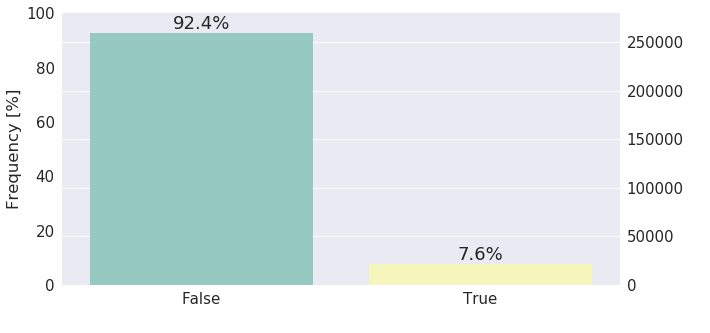

In [16]:
# time for copypaste from https://github.com/IdoZehori/Credit_Score/blob/master/Credit%20score.ipynb

import seaborn as sns
import matplotlib.pyplot as plt

def add_freq():
    # display percentages on plot
    ncount = len(df_acc)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom', clip_on=True)

    ax2.set_ylim(0,100)
    ax2.grid(None)
    
ax = sns.countplot(x = df_acc.had_bad_90 ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=280000)

add_freq()
plt.show()  # baddies with more than 90 days payment delay

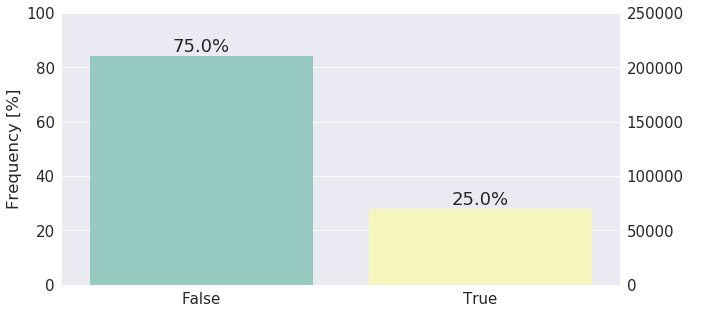

In [20]:
df_acc.ttl_delq_30 = df_acc.ttl_delq_30.astype(float)
df_acc["had_bad_30"] = df_acc["ttl_delq_30"].apply(lambda x: True if x > 0 else False)
    
ax = sns.countplot(x = df_acc.had_bad_30 ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=250000)
add_freq()

plt.show()  # baddies with more than 30 days payment delay